# Sheet 2: Maximum Likelihood Estimation

In this exercise sheet, we will look at various properties of maximum-likelihood estimation, and how to find maximum-likelihood parameters.

### ML vs. James Stein Estimator (15 P)

Let $X_1,\dots,X_n \in \mathbb{R}^d$ be independent draws from a multivariate Gaussian distribution with mean vector $\mu$ and covariance matrix $\Sigma = \sigma^2 I$. It can be shown that the maximum-likelihood estimator of the mean parameter $\mu$ is the empirical mean given by:
$$
\hat \mu_\text{ML} = \frac1N \sum_{i=1}^N X_i
$$
It was once believed that the maximum-likelihood estimator was the most accurate possible (i.e. the one with the smallest Euclidean distance from the true mean). However, it was later demonstrated that the following estimator
$$
\hat \mu_{JS} = \Big(1-\frac{(d-2) \cdot \sigma^2}{n \cdot \|\mu_\text{ML}\|^2}\Big) \hat \mu_\text{ML}
$$
(a shrinked version of the maximum-likelihood estimator towards the origin) has actually a smaller distance from the true mean when $d \geq 3$. This however assumes knowledge of the variance of the distribution for which the mean is estimated. This estimator is called the James-Stein estimator. While the proof is a bit involved, this fact can be easily demonstrated empirically through simulation. This is the object of this exercise.

The code below draws ten 50-dimensional points from a normal distribution with mean vector $\mu = (1,\dots,1)$ and covariance $\Sigma = I$.

In [29]:
def getdata(seed):

    n = 10              # data points
    d = 50              # dimensionality of data
    m = numpy.ones([d]) # true mean
    s = 1.0             # true standard deviation

    rstate = numpy.random.mtrand.RandomState(seed)
    X = rstate.normal(0,1,[n,d])*s+m
    
    return X,m,s

The following function computes the maximum likelihood estimator from a sample of the data assumed to be generated by a Gaussian distribution:

In [30]:
def ML(X):
    return X.mean(axis=0)

* **Based on the ML estimator function, write a function that receives as input the data $(X_i)_{i=1}^n$ and the (known) variance $\sigma^2$ of the generating distribution, and computes the James-Stein estimator**

In [31]:
def JS(X,s):
    m_ML = ML(X)
    n = X.shape[0]
    d = X.shape[1]
    m_JS = (1 - (((d - 2)*s)/(n * numpy.linalg.norm(m_ml)**2))) * m_ML
    return m_JS

We would like to compute the error of the maximum likelihood estimator and the James-Stein estimator for 100 different samples (where each sample consists of 10 draws generated by the function `getdata` with a different random seed). Here, for reproducibility, we use seeds from 0 to 99. The error should be measured as the Euclidean distance between the true mean vector and the estimated mean vector.

* **Compute the maximum-likelihood and James-Stein estimations.**
* **Measure the error of these estimations.**
* **Build a scatter plot comparing these errors for different samples.**

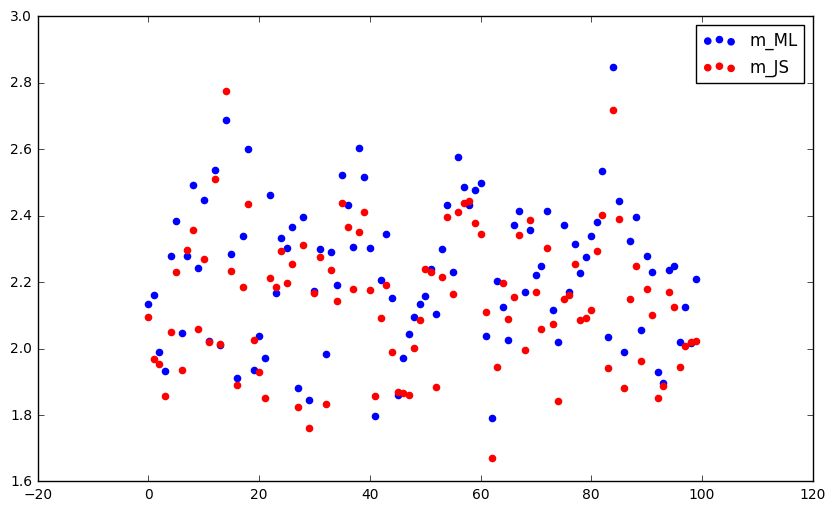

In [32]:
import numpy
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

samples = 100
errors_ML = numpy.zeros(samples)
errors_JS = numpy.zeros(samples)
seeds = numpy.arange(samples)
for seed in seeds:
    data, true_mean, true_sd = getdata(seed)
    m_ml = ML(data)
    m_js = JS(data, true_sd)
    errors_ML[seed] = numpy.linalg.norm(m_ml - true_mean)
    errors_JS[seed] = numpy.linalg.norm(m_js - true_mean)
    
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.scatter(seeds, errors_ML ,color='blue', label='m_ML');
ax.scatter(seeds, errors_JS ,color='red', label='m_JS');
ax.legend(loc=1);

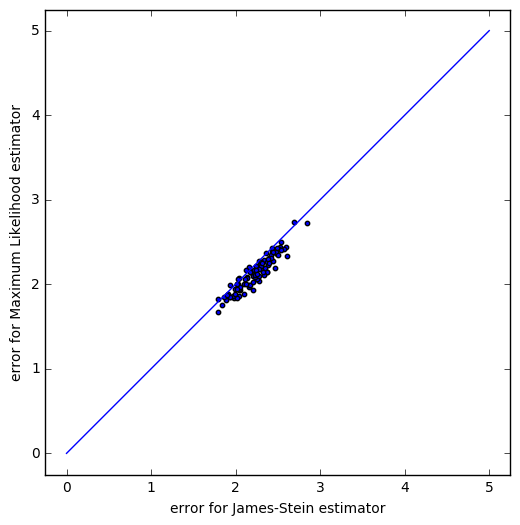

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

ml_l, js_l = [], []
for i in range(0,100):
    X,m,s = getdata(i)
    ml = ML(X)
    js = JS(X,s)
    
    ml_l.append(numpy.linalg.norm(m-ml))
    js_l.append(numpy.linalg.norm(m-js))

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(ml_l,js_l,s=10)
ax.set_xticks(numpy.arange(0,6,1))
ax.set_yticks(numpy.arange(0,6,1))
ax.plot([0, 5], [0, 5])

plt.xlabel('error for James-Stein estimator')
plt.ylabel('error for Maximum Likelihood estimator')

### Parameters of a mixture of exponentials (15 P)

We consider the following "mixture of exponentials" distribution supported on $\mathbb{R}^+$, that we use to generate data, but whose parameters $\alpha$ and $\beta$ are unknown.

$$p(x;\alpha,\beta) = 0.5 \cdot \big[\alpha e^{-\alpha x} + \beta e^{-\beta x}\big]$$

A dataset $\mathcal{D} = x_1,\dots,x_N$ with $N=200$ has been generated from that distribution. It is given below and plotted as a histogram.

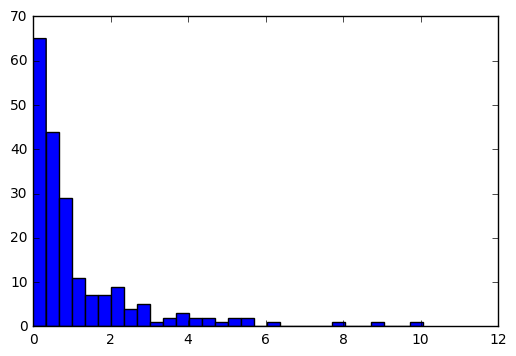

In [34]:
D=[ 0.74,  0.20,  0.56,  0.05,  0.67,  0.41,  0.74,  4.63,  0.59,  0.39,
    0.71,  0.17,  5.34,  0.33,  0.01,  1.11,  0.60,  0.41,  0.65,  1.97,
    0.19,  0.80,  0.04,  0.48,  0.54,  0.59,  0.31,  1.40,  0.63,  0.38,
    0.36,  0.02,  0.68,  0.72,  0.84,  0.30,  0.01,  1.37,  0.89,  0.10,
    0.21,  0.68,  0.14,  0.10,  0.11,  0.01,  0.09,  0.50,  0.34,  0.30,
    1.22, 10.05,  0.19,  0.04,  0.13,  1.53,  2.28,  1.76,  0.03,  0.31,
    0.37,  0.50,  0.05,  0.30,  0.53,  0.63,  4.20,  0.86,  0.29,  1.98,
    1.27,  0.35,  0.43,  0.35,  0.75,  0.25,  1.15,  1.65,  0.82,  0.37,
    2.55,  2.75,  3.06,  0.97,  2.65,  8.97,  0.04,  2.98,  0.36,  0.01,
    0.85,  0.90,  0.09,  0.01,  0.82,  2.30,  2.09,  0.29,  0.16,  2.12,
    5.28,  0.27,  0.15,  1.02,  0.51,  0.02,  1.72,  1.35,  0.51,  0.27,
    1.05,  2.24,  3.93,  0.62,  3.38,  0.56,  0.49,  2.84,  0.27,  0.12,
    3.99,  0.16,  0.09,  3.61,  0.54,  0.08,  0.31,  1.38,  0.63,  0.61,
    0.21,  0.13,  2.28,  2.61,  4.60,  0.02,  0.34,  0.15,  0.07,  2.44,
    0.86,  0.73,  2.01,  0.26,  0.72,  1.56,  0.09,  0.97,  0.24,  0.92,
    1.05,  0.71,  1.28,  3.79,  1.32,  0.17,  0.39,  2.82,  0.12,  2.06,
    2.04,  0.00,  1.94,  0.27,  0.91,  0.36,  0.92,  5.69,  0.33,  0.69,
    1.00,  2.19,  0.01,  0.08,  1.16,  0.31,  0.83,  0.41,  1.27,  0.08,
    4.69,  0.65,  0.43,  0.10,  2.92,  0.06,  6.21,  0.90,  0.00,  0.52,
    0.65,  0.26,  1.94,  0.37,  0.50,  5.66,  4.24,  0.40,  0.39,  7.89]

%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(D,bins=30)
plt.show()

For this dataset, the log-likelihood function is given by

\begin{align*}
\ell(\alpha,\beta) &= \log \prod_{i=1}^N p(x_i;\alpha,\beta) = \sum_{i=1}^N \log (e^{-\alpha x_i} + \beta e^{-\beta x_i}) - \log (2)
\end{align*}

Unfortunately, it is difficult to extract the parameters $\alpha,\beta$ analytically by solving directly the equation $\nabla \ell = 0$. Instead, we will analyze the function over a grid of parameters $\alpha$, $\beta$. We know a priori that parameters $\alpha$ and $\beta$ are in the intervals $[0.4,1.0]$ and $[1.5,4.5]$ respectively.

* **Build a grid on this limited domain and evaluate log-likelihood at each point of the grid.**
* **Plot the log-likelihood function as a contour plot, and superpose the grid to it.**

Highest log-likelihood values (i.e. most probable parameters) should appear in red, and lowest values should be plotted in blue. Two adjacent lines of the contour plot should represent a log-likelihood difference of 1.0. In your code, favor numpy array operations over Python loops.

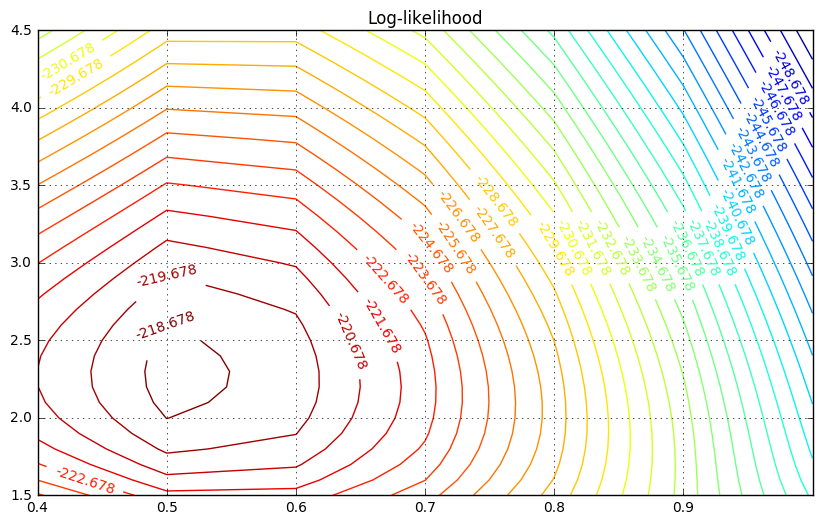

In [35]:
# delta defines the resolution of the grid
delta = 0.1
D = numpy.asarray(D)
# create alphas and betas
alphas = numpy.arange(0.4,1.+1e-9,delta)
betas = numpy.arange(1.5,4.5+1e-9,delta)
# arrange them into a grid
A,B = numpy.meshgrid(alphas, betas)
# repeat to enable broadcasting between A, B and D (circumvents for-loops)
As = numpy.repeat(A, 200).reshape(31, 7, 200)
Bs = numpy.repeat(B, 200).reshape(31, 7, 200)

# likelihood function
def loglikelihood(D, alpha, beta):
    return numpy.sum(numpy.log(alpha * numpy.exp(-1. * alpha * D) + beta * numpy.exp(-1. * beta * D)) - numpy.log(2), axis=2)

L = loglikelihood(D, As, Bs)

levels = numpy.arange(L.min(), L.max(), 1.)
plt.figure(figsize=(10,6))
CS1 = plt.contour(A, B, L, levels);
plt.clabel(CS1, inline=1, fontsize=10)
plt.title('Log-likelihood');
plt.grid()

### Gradent-Based Optimization (10 P)

As an alternative to computing the log-likelihood for a whole grid, we would like to find the optimal parameters $\alpha,\beta$ by gradient-based optimization. The partial derivatives of the log-likelihood function are given by:

\begin{align*}
\frac{\partial \ell(\alpha,\beta)}{\partial \alpha} &= \sum_{i=1}^N \frac{e^{-\alpha x_i} (1 - \alpha x_i)}{\alpha e^{-\alpha x_i} + \beta e^{-\beta x_i}}\\
\frac{\partial \ell(\alpha,\beta)}{\partial \beta} &= \sum_{i=1}^N \frac{e^{-\beta x_i} (1 - \beta x_i)}{\alpha e^{-\alpha x_i} + \beta e^{-\beta x_i}}
\end{align*}

A gradient ascent step of the log-likelihood function takes the form

$$
\begin{pmatrix}
\alpha\\
\beta
\end{pmatrix} \leftarrow
\begin{pmatrix}
\alpha\\
\beta
\end{pmatrix} + \gamma \nabla_{\alpha,\beta} \ell(\alpha,\beta)
$$

where $\gamma$ is a learning rate to be defined. We start with initial parameters $\alpha=0.7$ and $\beta=3.0$.


* **Implement the gradient ascent procedure.**
* **Run the gradient ascent with parameter $\gamma = 0.005$.**
* **Plot the trajectory of the gradient ascent in superposition to the contour plot of the previous exercise.**

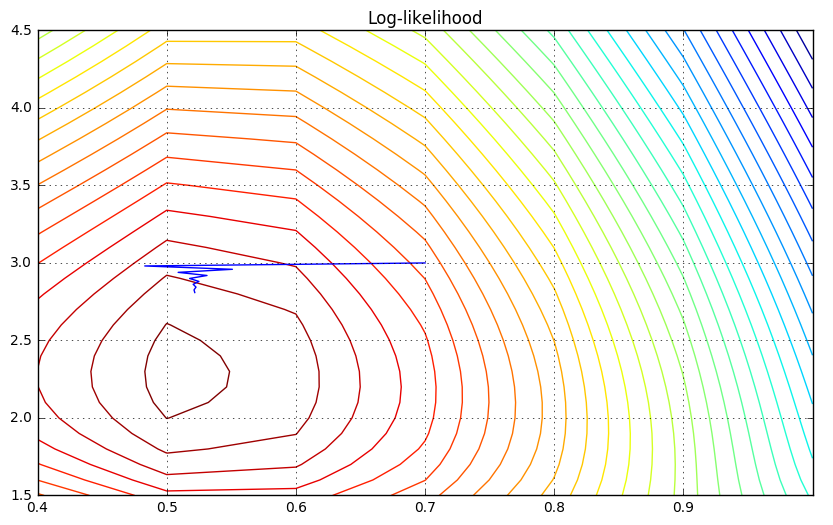

In [36]:
# TODO: needs fixing

# definition of gradient descent procedure
def gdstep(D, params, delta):
    alpha = params[0]
    beta = params[1]
    eax = numpy.exp(-1. * alpha * D)
    ebx = numpy.exp(-1. * beta * D)
    partiala = numpy.sum((eax * (1 - alpha * D)) / (alpha * eax + beta * ebx))
    partialb = numpy.sum((ebx * (1 - beta * D)) / (alpha * eax + beta * ebx))
    return [alpha + delta * partiala, beta + delta * partialb]

# initial values for the parameters
alpha = 0.7
beta = 3.0
delta = 0.005
steps = 10 # weird: 100 steps is enough for convergence?
params = [[alpha, beta]]

# run GD optimization
for i in range(steps):
    params.append(gdstep(D, params[i], delta))

# Plot results
params = numpy.asarray(params)
levels = numpy.arange(L.min(), L.max(), 1.)
plt.figure(figsize=(10,6))
CS = plt.contour(A, B, L, levels);
TR = plt.plot(params[:,0], params[:,1])
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Log-likelihood');
plt.grid()

As it can be seen, the optimization procedure does not converge in reasonable time and seems to oscillate.

* **Explain the problem(s) with this approach. Propose a simple improvement of the optimization technique and apply it.**

**Explanation**: The problem is that the learning rate is fixed but the step size needed improve is decreasing (because we get closer and closer to the minimum).

**Proposition**: A simple resolution is to anneal/decay the learning rate e.g. by multiplying it with some constant < 1.

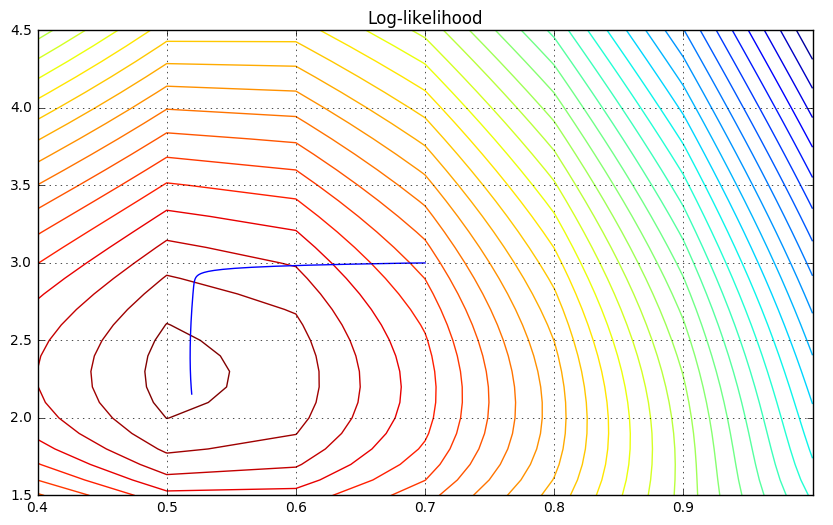

In [42]:
def gdstep(D, params, params_momentum, params_RMS, delta, delta_momentum):
    alpha = params[0]
    beta = params[1]
    
    partiala_momentum = params_momentum[0]
    partialb_momentum = params_momentum[1]
    
    eax = numpy.exp(-1. * alpha * D)
    ebx = numpy.exp(-1. * beta * D)
    partiala = numpy.sum((eax * (1 - alpha * D)) / (alpha * eax + beta * ebx))
    partialb = numpy.sum((ebx * (1 - beta * D)) / (alpha * eax + beta * ebx))
    
#     with momentum
    return [alpha + delta * partiala*(1-delta_momentum) - delta_momentum * partiala_momentum, beta + delta * partialb *(1-delta_momentum) - delta_momentum * partialb_momentum]
    
    
#     No improvement
#     return [alpha + delta * (partiala), beta + delta * (partialb)]

# initial values for the parameters
alpha = 0.7
beta = 3.0
delta = 0.0005
delta_momentum = 0.0005
steps = 1000 # weird: 100 steps is enough for convergence?
params = [[alpha, beta]]
params_momentum =[[0,0]]
params_RMS = [[0,0]]

# run GD optimization
for i in range(steps):
    params.append(gdstep(D, params[i], params_momentum[i], params_RMS[i], delta*0.75, delta_momentum*0.5))
    params_momentum.append(params[i])
    params_RMS.append(params[i])

# Plot results
params = numpy.asarray(params)
levels = numpy.arange(L.min(), L.max(), 1.)
plt.figure(figsize=(10,6))
CS = plt.contour(A, B, L, levels);
TR = plt.plot(params[:,0], params[:,1])
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Log-likelihood');
plt.grid()